##1) Conceitos Fundamentais

Explique o conceito de validação cruzada e sua importância no treinamento de modelos de machine learning.
Diferencie entre K-Fold, Stratified K-Fold e Leave-One-Out Cross-Validation (LOO). Em quais situações cada uma dessas técnicas seria mais adequada?


Validação cruzada é uma técnica utilizada para avaliar a performance de um modelo de machine learning. Ela consiste em dividir os dados em várias partes e utilizar essas partes ora para treino e ora para testes, dependendo do subconjunto analisado.

- K-Fold: Dados divididos em k partes, k-1 partes utilizadas para treino e a parte restante utilizada como teste. Processo repetido até que todas as partes tenham passado tanto pelo treino quanto pelo teste 1 vez. Boa técnica para datasets que sejam grandes e balanceados.
- Stratified K-Fold: Técnica parecida com o K-Fold, porém respeita a proporção das classes ao realizar a separação em folds. Por isso é a técnica preferencial para datasets desbalanceados.
- LOO: O modelo é treinado em n-1 instâncias e a instância restante é usada como dado de teste. Processo é repetido até que todas as instâncias tenham sido usadas como teste. É uma técnica boa para quando estamos trabalhando com datasets muito pequenos, pois usa completamente todos os dados.

## 2) Avaliação de Modelos de Classificação
Discuta as vantagens e desvantagens de usar acurácia, precisão, recall, F1-score e AUC-ROC para avaliar modelos de classificação.
Por que essas métricas são importantes, especialmente em datasets desbalanceados?


Acurácia é a taxa de acertos de previsões em cima do total de previsões realizadas. É uma métrica fácil de interpretar e de calcular, porém pode ser enganosa caso as classes estejam desbalanceadas. Por ex: se 95% das classes são X, se um modelo sempre chutar X, terá uma acurácia de 95%, porém não será um modelo útil. A Precisão avalia os verdadeiros positivos em relação ao total de previsões positivas, então é uma métrica valorizada quando queremos diminuir a taxa de falsos positivos (ex: diagnóstico de doenças) ou quando a classe positiva é minoritária no dataset. O Recall é a proporção de verdadeiros positivos em relação ao total de positivos reais, então é uma métrica valorizada quando queremos minimizar os falso negativos (ex: diagnóstico de câncer). O F1-Score é uma média harmônica entre a precisão e o recall, sendo a métrica mais importante para datasets desbalanceados, pois não atribui mais importância a nenhuma das duas métricas, o que facilita encontrar um ponto de equilíbrio entre elas. Dessa forma, faz com que o modelo não seja tendencioso para nenhuma das duas. Por fim, a AUC-ROC mede a capacidade do modelo de distinguir entre as classes, pois analisa a taxa de recall contra a taxa de falsos positivos em vários limiares de classificação. Ela fornece uma visão geral do desempenho do modelo nos diferentes limiares, porém pode ser mais difícil de interpretar do que uma métrica mais direta. Em datasets muito desbalanceados, pode ser tendenciosa, pois a taxa de falsos positivos pode ser baixa devido à grande quantidade de negativos.

## 3) Pré-processamento de Dados
Descreva as etapas necessárias para preparar um dataset para modelagem, incluindo:
- Imputação de valores ausentes
- Codificação de variáveis categóricas
- Normalização/padronização
- Tratamento de outliers

Explique a importância de cada uma dessas etapas.


Etapas do pré-processamento de dados:

- Limpeza de dados: Devemos sempre checar por dados faltantes, incompletos, inconsistentes ou irrelevantes ao estudo e tratá-los de forma adequada. Apagar entradas faltantes ou irrelevantes e preencher dados incompletos é essencial para se melhorar o desempenho do modelo. Os dados faltantes (NaN) não são reconhecidos pelos modelos, então não conseguimos realizar treinamentos com esses dados. Apagar entradas irrelevantes ajuda o modelo a ser mais preciso, pois elimina potenciais fatores de confusão.
- Conversão de dados categóricos para numéricos: Frequentemente encontramos features que pertencem à uma classe diferente da numérica. É essencial que convertamos esses dados para numéricos, visto que o modelo só sabe trabalhar com números, e não textos (strings).
- Padronização dos dados: Mesmo depois que todos os dados pertençam à categoria numérica, pode acontecer de trabalharmos com ordens de grandeza extremamente diferentes, porém o modelo não sabe disso. Ele irá tratar números maiores como sendo "mais importantes", atribuindo um maior peso a esses dados quando comparados a dados menores. Entretanto, não podemos dizer que "18 anos" é menos importante do que "R$3452,56". Dessa forma, a padronização força os dados a ficarem na mesma ordem de grandeza (escala), o que elimina esse viés de seleção na etapa de treinamento.
- Tratamento de outliers: Às vezes nos deparamos com dados que estão muito fora da faixa esperada. Normalmente consideramos outliers valores que estão 1,5*IQR acima ou abaixo. Em algumas situações, o fato daquele valor existir já nos diz alguma coisa, porém em outras devemos avaliar se iremos manter os valores como são ou se iremos transformá-los de alguma forma, pois outliers significativos possuem a capacidade de impactar negativamente na padronização dos dados, pois afetam a variância e a média dos mesmos. Isso se traduz em um viés na hora de treinar o modelo de aprendizado de máquina.



 ## 4) Análise Exploratória dos Dados

Carregue o dataset Heart Disease UCI e realize uma análise exploratória, verificando:
- Valores ausentes
- Tipos de dados
- Distribuição das classes

Crie visualizações para explorar a relação entre as variáveis independentes (idade, pressão arterial, colesterol) e a variável dependente (doença cardíaca).


In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

heart_df = pd.read_csv(path + "/heart.csv")
heart_df

100%|██████████| 6.18k/6.18k [00:00<00:00, 6.19MB/s]

Extracting files...


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
heart_df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
heart_df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


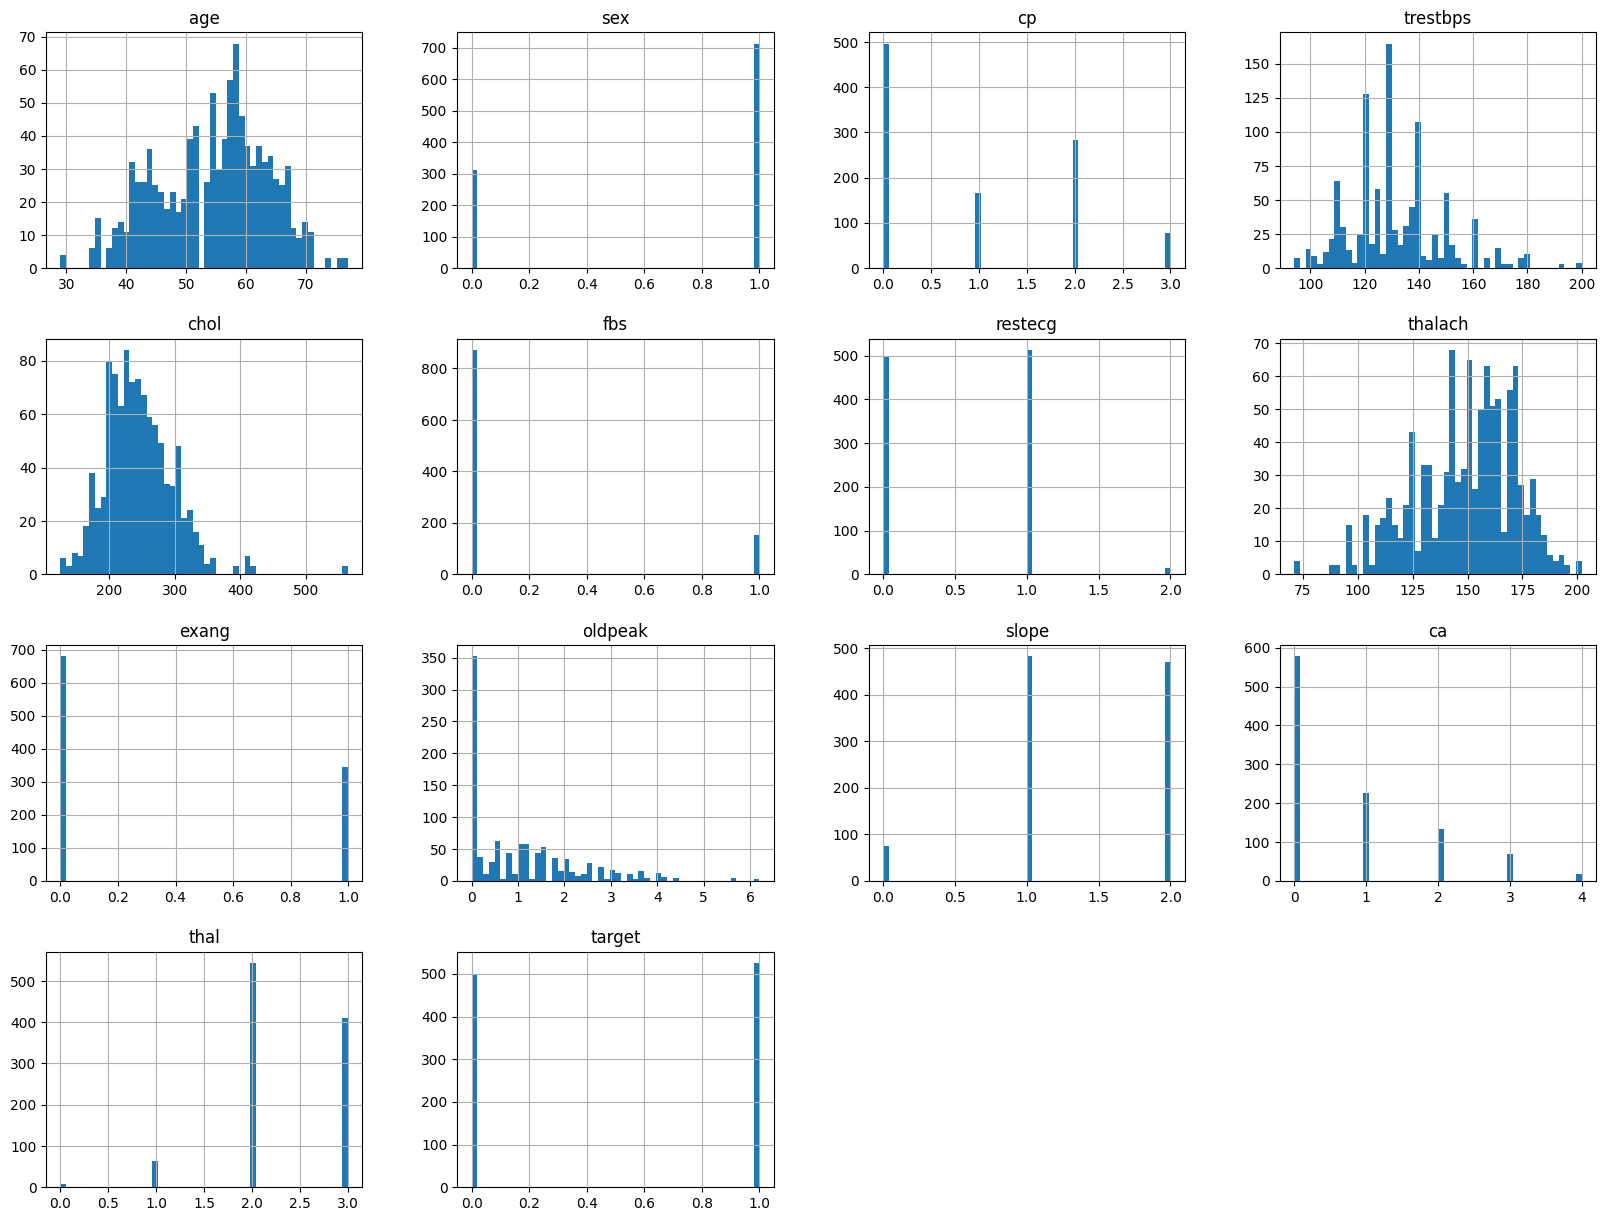

In [5]:
import matplotlib.pyplot as plt

heart_df.hist(bins=50, figsize=(20,15))
plt.show()

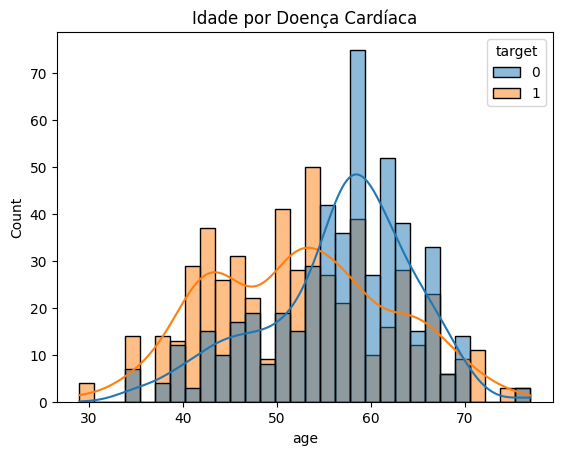

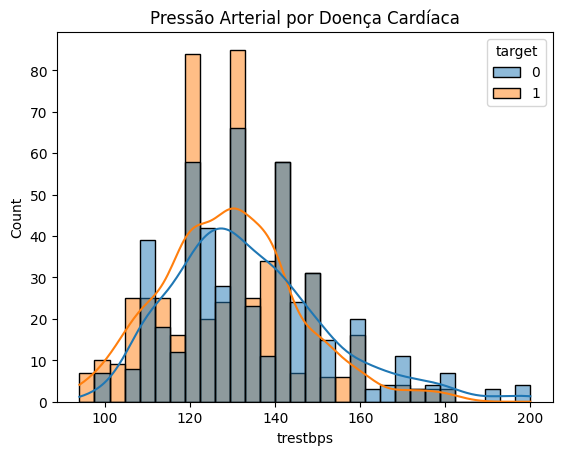

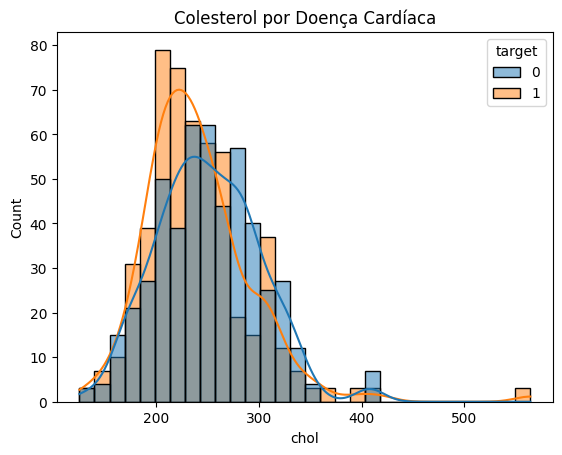

In [6]:
import seaborn as sns

sns.histplot(data=heart_df, hue='target', x='age', kde=True, bins=30)
plt.title('Idade por Doença Cardíaca')
plt.show()

sns.histplot(data=heart_df, hue='target', x='trestbps', kde=True, bins=30)
plt.title('Pressão Arterial por Doença Cardíaca')
plt.show()

sns.histplot(data=heart_df, hue='target', x='chol', kde=True, bins=30)
plt.title('Colesterol por Doença Cardíaca')
plt.show()

## 5) Aplicação do Pré-processamento

Execute as etapas de pré-processamento no dataset Heart Disease UCI:
- Impute valores ausentes (se houver)
- Converta variáveis categóricas em numéricas
- Normalize ou padronize as variáveis numéricas
- Identifique e trate outliers


In [7]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [8]:
import sklearn.preprocessing as preprocessing

X = preprocessing.RobustScaler().fit_transform(X)
X

array([[-0.30769231,  0.        , -0.5       , ...,  1.        ,
         2.        ,  1.        ],
       [-0.23076923,  0.        , -0.5       , ..., -1.        ,
         0.        ,  1.        ],
       [ 1.07692308,  0.        , -0.5       , ..., -1.        ,
         0.        ,  1.        ],
       ...,
       [-0.69230769,  0.        , -0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.46153846, -1.        , -0.5       , ...,  1.        ,
         0.        ,  0.        ],
       [-0.15384615,  0.        , -0.5       , ...,  0.        ,
         1.        ,  1.        ]])

## 6) Construção e Avaliação do Modelo KNN

- Divida o dataset em treino e teste.
- Construa um modelo KNN para prever a presença de doenças cardíacas.
- Calcule a acurácia do modelo e discuta seu significado no contexto de um dataset potencialmente desbalanceado.


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {(accuracy * 100):.2f}%')

Acurácia do modelo: 92.68%


A alta acurácia do modelo pode estar falseada no contexto de um dataset potencialmente desbalanceado (algumas features possuem mais entradas de uma classe do que outras - como a feature 'sex'), então nos guiarmos apenas por esta métrica pode nos induzir a uma avaliação errada do modelo.

## 7) Aplicação da Validação Cruzada

- Aplique validação cruzada K-Fold (5 folds) ao modelo KNN.
- Compare a acurácia de cada fold e calcule a média e o desvio padrão.
- O que esses valores indicam sobre a capacidade de generalização do modelo?


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5)
mean_score = scores.mean()
std_score = scores.std()
print(f'Acurácia de cada fold: {scores}')
print(f'Média das acurácias: {mean_score:.3f}')
print(f'Desvio padrão: {std_score:.3f}')

Acurácia de cada fold: [0.90731707 0.94146341 0.91707317 0.94146341 0.92682927]
Média das acurácias: 0.927
Desvio padrão: 0.013


O modelo tem um desvio padrão pequeno (0,013), o que significa que ele foi consistente em todos os folds. Logo, podemos inferir que o modelo tem uma boa capacidade de generalização.

## 8) Otimização do Modelo KNN

- Teste diferentes valores de k (3, 5, 7, 9) no modelo KNN, aplicando validação cruzada.
- Escolha o valor que resulta no melhor desempenho e justifique sua escolha com base nas métricas de avaliação.


In [13]:
from sklearn.model_selection import KFold
import numpy as np
results = {}

k_values = [3, 5, 7, 9]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[k] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }

for k, result in results.items():
    print(f'k = {k}')
    print(f'Acurácias de cada fold: {result["scores"]}')
    print(f'Média das acurácias: {result["mean_accuracy"]:.4f}')
    print(f'Desvio padrão das acurácias: {result["std_accuracy"]:.4f}')
    print('-' * 40)

k = 3
Acurácias de cada fold: [0.92682927 0.9902439  0.97073171 0.93658537 0.92682927]
Média das acurácias: 0.9502
Desvio padrão das acurácias: 0.0257
----------------------------------------
k = 5
Acurácias de cada fold: [0.80487805 0.92682927 0.87317073 0.84878049 0.82926829]
Média das acurácias: 0.8566
Desvio padrão das acurácias: 0.0417
----------------------------------------
k = 7
Acurácias de cada fold: [0.81463415 0.90731707 0.87317073 0.84878049 0.8195122 ]
Média das acurácias: 0.8527
Desvio padrão das acurácias: 0.0345
----------------------------------------
k = 9
Acurácias de cada fold: [0.8097561  0.92682927 0.87317073 0.88780488 0.83414634]
Média das acurácias: 0.8663
Desvio padrão das acurácias: 0.0410
----------------------------------------


O melhor valor de k dentre os solicitados é k = 3, pois é o k que apresenta o menor desvio padrão (ou seja, a maior consistência no desempenho entre os diferentes folds) e a maior acurácia média.

## 9) Comparação de Métricas de Avaliação

- Calcule precisão, recall e F1-score para o modelo KNN.
- Compare essas métricas com a acurácia e discuta por que elas podem ser mais informativas em datasets desbalanceados.


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precisão: 0.9074
Recall: 0.9515
F1-score: 0.9289


Acurácia é a taxa de acertos de previsões em cima do total de previsões realizadas. É uma métrica fácil de interpretar e de calcular, porém pode ser enganosa caso as classes estejam desbalanceadas. Por ex: se 95% das classes são X, se um modelo sempre chutar X, terá uma acurácia de 95%, porém não será um modelo útil. A Precisão avalia os verdadeiros positivos em relação ao total de previsões positivas, então é uma métrica valorizada quando queremos diminuir a taxa de falsos positivos (ex: diagnóstico de doenças) ou quando a classe positiva é minoritária no dataset. O Recall é a proporção de verdadeiros positivos em relação ao total de positivos reais, então é uma métrica valorizada quando queremos minimizar os falso negativos (ex: diagnóstico de câncer). O F1-Score é uma média harmônica entre a precisão e o recall, sendo a métrica mais importante para datasets desbalanceados, pois não atribui mais importância a nenhuma das duas métricas, o que facilita encontrar um ponto de equilíbrio entre elas. Dessa forma, faz com que o modelo não seja tendencioso para nenhuma das duas.

## 10) Análise da Curva ROC e Comparação de Modelos

- Calcule a curva ROC e o AUC para o modelo KNN.
- Explique como a utilização destas ferramentas ajuda a melhorar o desempenho do modelo.


AUC: 0.9267


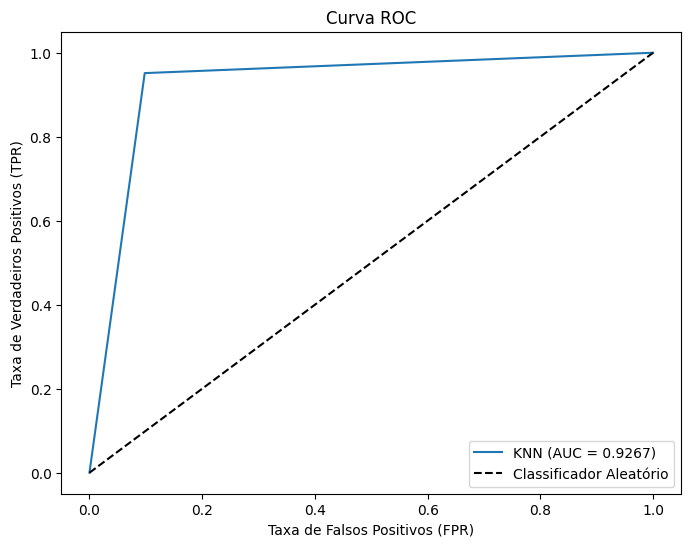

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A curva ROC e a AUC (Area Under Curve) fornecem uma visão da capacidade do modelo de distinguir entre as classes do target. Elas analisam diretamente o desempenho do modelo, pois a curva ROC plota a taxa de falso positivos contra a taxa de verdadeiro positivos, então quanto mais próxima do canto superior esquerdo ela está, melhor é o modelo. Já a AUC avalia a capacidade do modelo de distinção entre as classes. Uma AUC de 0.5 significa um modelo aleatório, AUC menores que isso significam modelos piores que o aleatório e maiores que isso (e quanto mais perto de 1.0, melhor) indicam modelos melhores.

## 11) Reflexão sobre o Desempenho do Modelo

- Com base nas métricas de avaliação (precisão, recall, F1-score, AUC-ROC) e nos resultados da validação cruzada, escreva uma reflexão sobre o desempenho do modelo KNN.
- Identifique pontos fortes e fracos do modelo.
- Sugira possíveis melhorias, como:
  - Ajuste de hiperparâmetros
  - Uso de outros algoritmos
  - Técnicas de balanceamento de classes


O modelo apresentou métricas de avaliação bem satisfatórias (todas acima de 90%), o que é esperado para um dataset já conhecido e sem necessidade de muitas etapas de pré-processamento de dados. Talvez o desempenho teria sido ainda melhor se os outliers tivessem sido tratados diretamente e se tivéssemos usados a técnica de Stratified K-Fold na validação cruzada, para respeitar o desbalanceamento dos dados.